In [5]:
#pip install numpy

In [6]:
#pip install pandas

In [9]:
#pip install sklearn

In [475]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)

In [578]:
df = pd.read_csv("/Users/ganesh_dhasade/Documents/kaggle/Titanic Dataset/titanic/train.csv")
TestDataSet2 = pd.read_csv("/Users/ganesh_dhasade/Documents/kaggle/Titanic Dataset/titanic/test.csv")

In [495]:
#-------Preprocessing------

In [496]:
df.shape

(891, 13)

In [497]:
#check the number of values in each category of Passenger Class.
df.groupby('Pclass')['Pclass'].agg('count')

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [498]:
#check the number of values in each category of sex.
df.groupby('Sex')['Sex'].agg('count')

Sex
female    314
male      577
Name: Sex, dtype: int64

In [499]:
#check the number of values in each category of cabin.
df.groupby('Salutation')['Salutation'].agg('count')

#I try to get rid of all extra salutation and keep it as 
#Master --> kids
#Miss --> young girls
#Mr --> adult man
#Mrs --> adult women

Salutation
Master     40
Miss      185
Mr        537
Mrs       129
Name: Salutation, dtype: int64

In [500]:
df

,PassengerId,Survived,Pclass,Salutation,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Mr,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [501]:
#Remove all unwanted col. like PassengerId and Ticket
df2 = df.drop(['PassengerId','Ticket','Name','Cabin'], axis = 'columns')
TestDataSet = TestDataSet.drop(['PassengerId','Ticket','Name','Cabin'], axis = 'columns')

In [502]:
TestDataSet

,Pclass,Salutation,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,34.50,0,0,7.8292,Q
1,3,Mrs,female,47.00,1,0,7.0000,S
2,2,Mr,male,62.00,0,0,9.6875,Q
3,3,Mr,male,27.00,0,0,8.6625,S
4,3,Mrs,female,22.00,1,1,12.2875,S
5,3,Mr,male,14.00,0,0,9.2250,S
6,3,Miss,female,30.00,0,0,7.6292,Q
7,2,Mr,male,26.00,1,1,29.0000,S
8,3,Mrs,female,18.00,0,0,7.2292,C
9,3,Mr,male,21.00,2,0,24.1500,S


In [503]:
#--------data cleaning------

In [504]:
df3 = df2.copy()

In [505]:
#---------HANDLE NULL VALUES-------

In [511]:
df3.isnull().sum()

Survived        0
Pclass          0
Salutation      0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [512]:
TestDataSet.isnull().sum()

Pclass         0
Salutation     0
Sex            0
Age           86
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [508]:
df3.shape

(891, 9)

In [509]:
TestDataSet.shape

(418, 8)

In [510]:
#Drop complete row where embarked is null
df3 = df2.dropna(subset=['Embarked'])
TestDataSet['Fare'] = TestDataSet['Fare'].fillna((TestDataSet['Fare'].mean()))

In [473]:

#TestDataSet2['Fare'] = TestDataSet2['Fare'].fillna((TestDataSet2['Fare'].mean()))

In [474]:
#TestDataSet = TestDataSet['Fare'].fillna((TestDataSet['Fare'].mean()))

In [513]:
df3.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [514]:
#-----handle null values of age using KNN algorithm------

In [515]:
df4 = df3.copy()

In [516]:
#Get dummies for categorical vairables
df4 = pd.get_dummies(df4)
TestDataSet = pd.get_dummies(TestDataSet)

In [517]:
df4.shape

(889, 15)

In [518]:
TestDataSet.shape

(418, 14)

In [519]:
df4['Age'] = df4['Age'].round(decimals=0)
TestDataSet['Age'] = TestDataSet['Age'].round(decimals=0)

In [520]:
df4

,Survived,Pclass,Age,SibSp,Parch,Fare,Salutation_Master,Salutation_Miss,Salutation_Mr,Salutation_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,0,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,1,0,0,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,0,1,0,0,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,0,1,0,0,1,1,0,0


In [521]:
#Now all age null values move to Test dataset and all values available as train

AgeTrain = df4[df4['Age'].notna()]
AgeTest = df4[df4['Age'].isna()]

#Test dataset

TestDSAgeTrain = TestDataSet[TestDataSet['Age'].notna()]
TestDSAgeTest = TestDataSet[TestDataSet['Age'].isna()]

In [522]:
AgeTrain.shape

(712, 15)

In [523]:
TestDSAgeTrain.shape

(332, 14)

In [524]:
AgeTest.shape

(177, 15)

In [525]:
TestDSAgeTest.shape

(86, 14)

In [526]:
AgeTarget = AgeTrain['Age']
TestAgeTarget = TestDSAgeTrain['Age']

In [527]:
AgeIV = AgeTrain.drop(['Age'],axis = 'columns')
TestAgeIV = TestDSAgeTrain.drop(['Age'],axis = 'columns')

In [528]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(AgeIV, AgeTarget, test_size=0.3)
X_Test_train, X_Test_test, y_Test_train, y_Test_test = train_test_split(TestAgeIV, TestAgeTarget, test_size=0.3)

In [529]:
#Import knearest neighbors Classifier model k=50
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn1 = KNeighborsClassifier(n_neighbors=10)
knn2 = KNeighborsClassifier(n_neighbors=10)

In [530]:
#Train the model using the training sets
knn1.fit(X_train, y_train)
knn2.fit(X_Test_train, y_Test_train)

KNeighborsClassifier(n_neighbors=10)

In [531]:
#Predict the response for test dataset
y_pred = knn1.predict(X_test)
y_Test_pred = knn2.predict(X_Test_test)

In [532]:
#Model evaluation for k=5
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Train dataset:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy Test dataset:",metrics.accuracy_score(y_Test_test, y_Test_pred))

Accuracy Train dataset: 0.06074766355140187
Accuracy Test dataset: 0.04


In [533]:
AgeTest = AgeTest.drop(['Age'], axis='columns')
TestDSAgeTest = TestDSAgeTest.drop(['Age'], axis='columns')

In [534]:
AgeTest.shape

(177, 14)

In [535]:
Age_Predt =  knn1.predict(AgeTest)
Age_Test_Predt =  knn2.predict(TestDSAgeTest)

In [536]:
Age_Predt

array([21., 23., 16., 30., 16., 19., 40., 16., 30., 30., 22., 28., 16.,
       34., 61., 30.,  9., 19., 22., 16., 22., 22., 19., 32., 24., 22.,
       21.,  4.,  1., 22., 17., 24., 17., 35., 24., 24., 19., 42.,  9.,
       21., 16., 24., 29., 19., 24., 23., 27.,  4., 22., 52., 21., 16.,
       26., 16., 19., 35., 30., 19., 16., 30., 28., 22., 30., 24., 30.,
       36., 19.,  4., 61., 30., 16., 16., 28., 16., 16., 39., 19., 21.,
       24., 19., 25., 19., 23., 30., 22., 21.,  4., 32., 16., 22., 42.,
       21., 22., 19., 21., 22., 42., 19., 24., 16., 36., 28., 16., 35.,
       22., 39., 30., 30., 18., 30.,  4., 28., 23., 20., 18., 21., 22.,
       23., 30., 16., 26., 33., 22., 16., 61., 30., 19., 16., 22.,  4.,
       21., 21., 19., 28., 32., 42., 19., 16., 19., 18., 42., 19., 16.,
       32., 16.,  9., 35., 28., 16., 19., 19., 19., 19., 28.,  1., 30.,
       30., 21., 21.,  4., 21., 24., 32., 19., 25., 32., 21., 30., 22.,
       32., 24., 30., 30., 24., 16., 19.,  4.])

In [537]:
AgeTest['Age'] = Age_Predt
TestDSAgeTest['Age'] = Age_Test_Predt

In [538]:
TestDSAgeTest

,Pclass,SibSp,Parch,Fare,Salutation_Master,Salutation_Miss,Salutation_Mr,Salutation_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
10,3,0,0,7.8958,0,0,1,0,0,1,0,0,1,27.0
22,1,0,0,31.6833,0,0,0,1,1,0,0,0,1,45.0
29,3,2,0,21.6792,0,0,1,0,0,1,1,0,0,2.0
33,3,1,2,23.4500,0,0,0,1,1,0,0,0,1,0.0
36,3,0,0,8.0500,0,1,0,0,1,0,0,0,1,23.0
39,3,0,0,56.4958,0,0,1,0,0,1,0,0,1,18.0
41,1,0,0,26.5500,0,0,1,0,0,1,0,0,1,42.0
47,3,0,0,7.7500,0,0,1,0,0,1,0,1,0,21.0
54,2,0,0,15.5792,0,0,1,0,0,1,1,0,0,40.0
58,3,1,0,16.1000,0,0,1,0,0,1,0,0,1,40.0


In [539]:
AgeTrain

,Survived,Pclass,Age,SibSp,Parch,Fare,Salutation_Master,Salutation_Miss,Salutation_Mr,Salutation_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,1,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,0,0,1,1,0,0,1,0
886,0,2,27.0,0,0,13.0000,0,0,1,0,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,1,0,0,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,0,1,0,0,1,1,0,0


In [540]:
AgeTrain.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Salutation_Master', 'Salutation_Miss', 'Salutation_Mr',
       'Salutation_Mrs', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [541]:
TestDSAgeTrain.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Salutation_Master',
       'Salutation_Miss', 'Salutation_Mr', 'Salutation_Mrs', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [542]:
AgeTest = AgeTest[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Salutation_Master', 'Salutation_Miss', 'Salutation_Mr',
       'Salutation_Mrs', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]

TestDSAgeTest = TestDSAgeTest[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Salutation_Master',
       'Salutation_Miss', 'Salutation_Mr', 'Salutation_Mrs', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [543]:
ConcatBothFrameTrain = [AgeTrain, AgeTest]

In [544]:
ConcatBothFrameTest = [TestDSAgeTrain, TestDSAgeTest]

In [545]:
df5 = pd.concat(ConcatBothFrameTrain)
TestDataSet = pd.concat(ConcatBothFrameTest)

In [546]:
TestDataSet.shape

(418, 14)

In [547]:
df5.shape

(889, 15)

In [548]:
TestDataSet.isnull().sum()

Pclass               0
Age                  0
SibSp                0
Parch                0
Fare                 0
Salutation_Master    0
Salutation_Miss      0
Salutation_Mr        0
Salutation_Mrs       0
Sex_female           0
Sex_male             0
Embarked_C           0
Embarked_Q           0
Embarked_S           0
dtype: int64

In [549]:
df5.isnull().sum()

Survived             0
Pclass               0
Age                  0
SibSp                0
Parch                0
Fare                 0
Salutation_Master    0
Salutation_Miss      0
Salutation_Mr        0
Salutation_Mrs       0
Sex_female           0
Sex_male             0
Embarked_C           0
Embarked_Q           0
Embarked_S           0
dtype: int64

In [550]:
#-------Now Transformation is done --------

In [551]:
#Check correlation between each columns

In [552]:
#pip install matplotlib

In [553]:
#pip install seaborn

In [554]:
import seaborn as sns

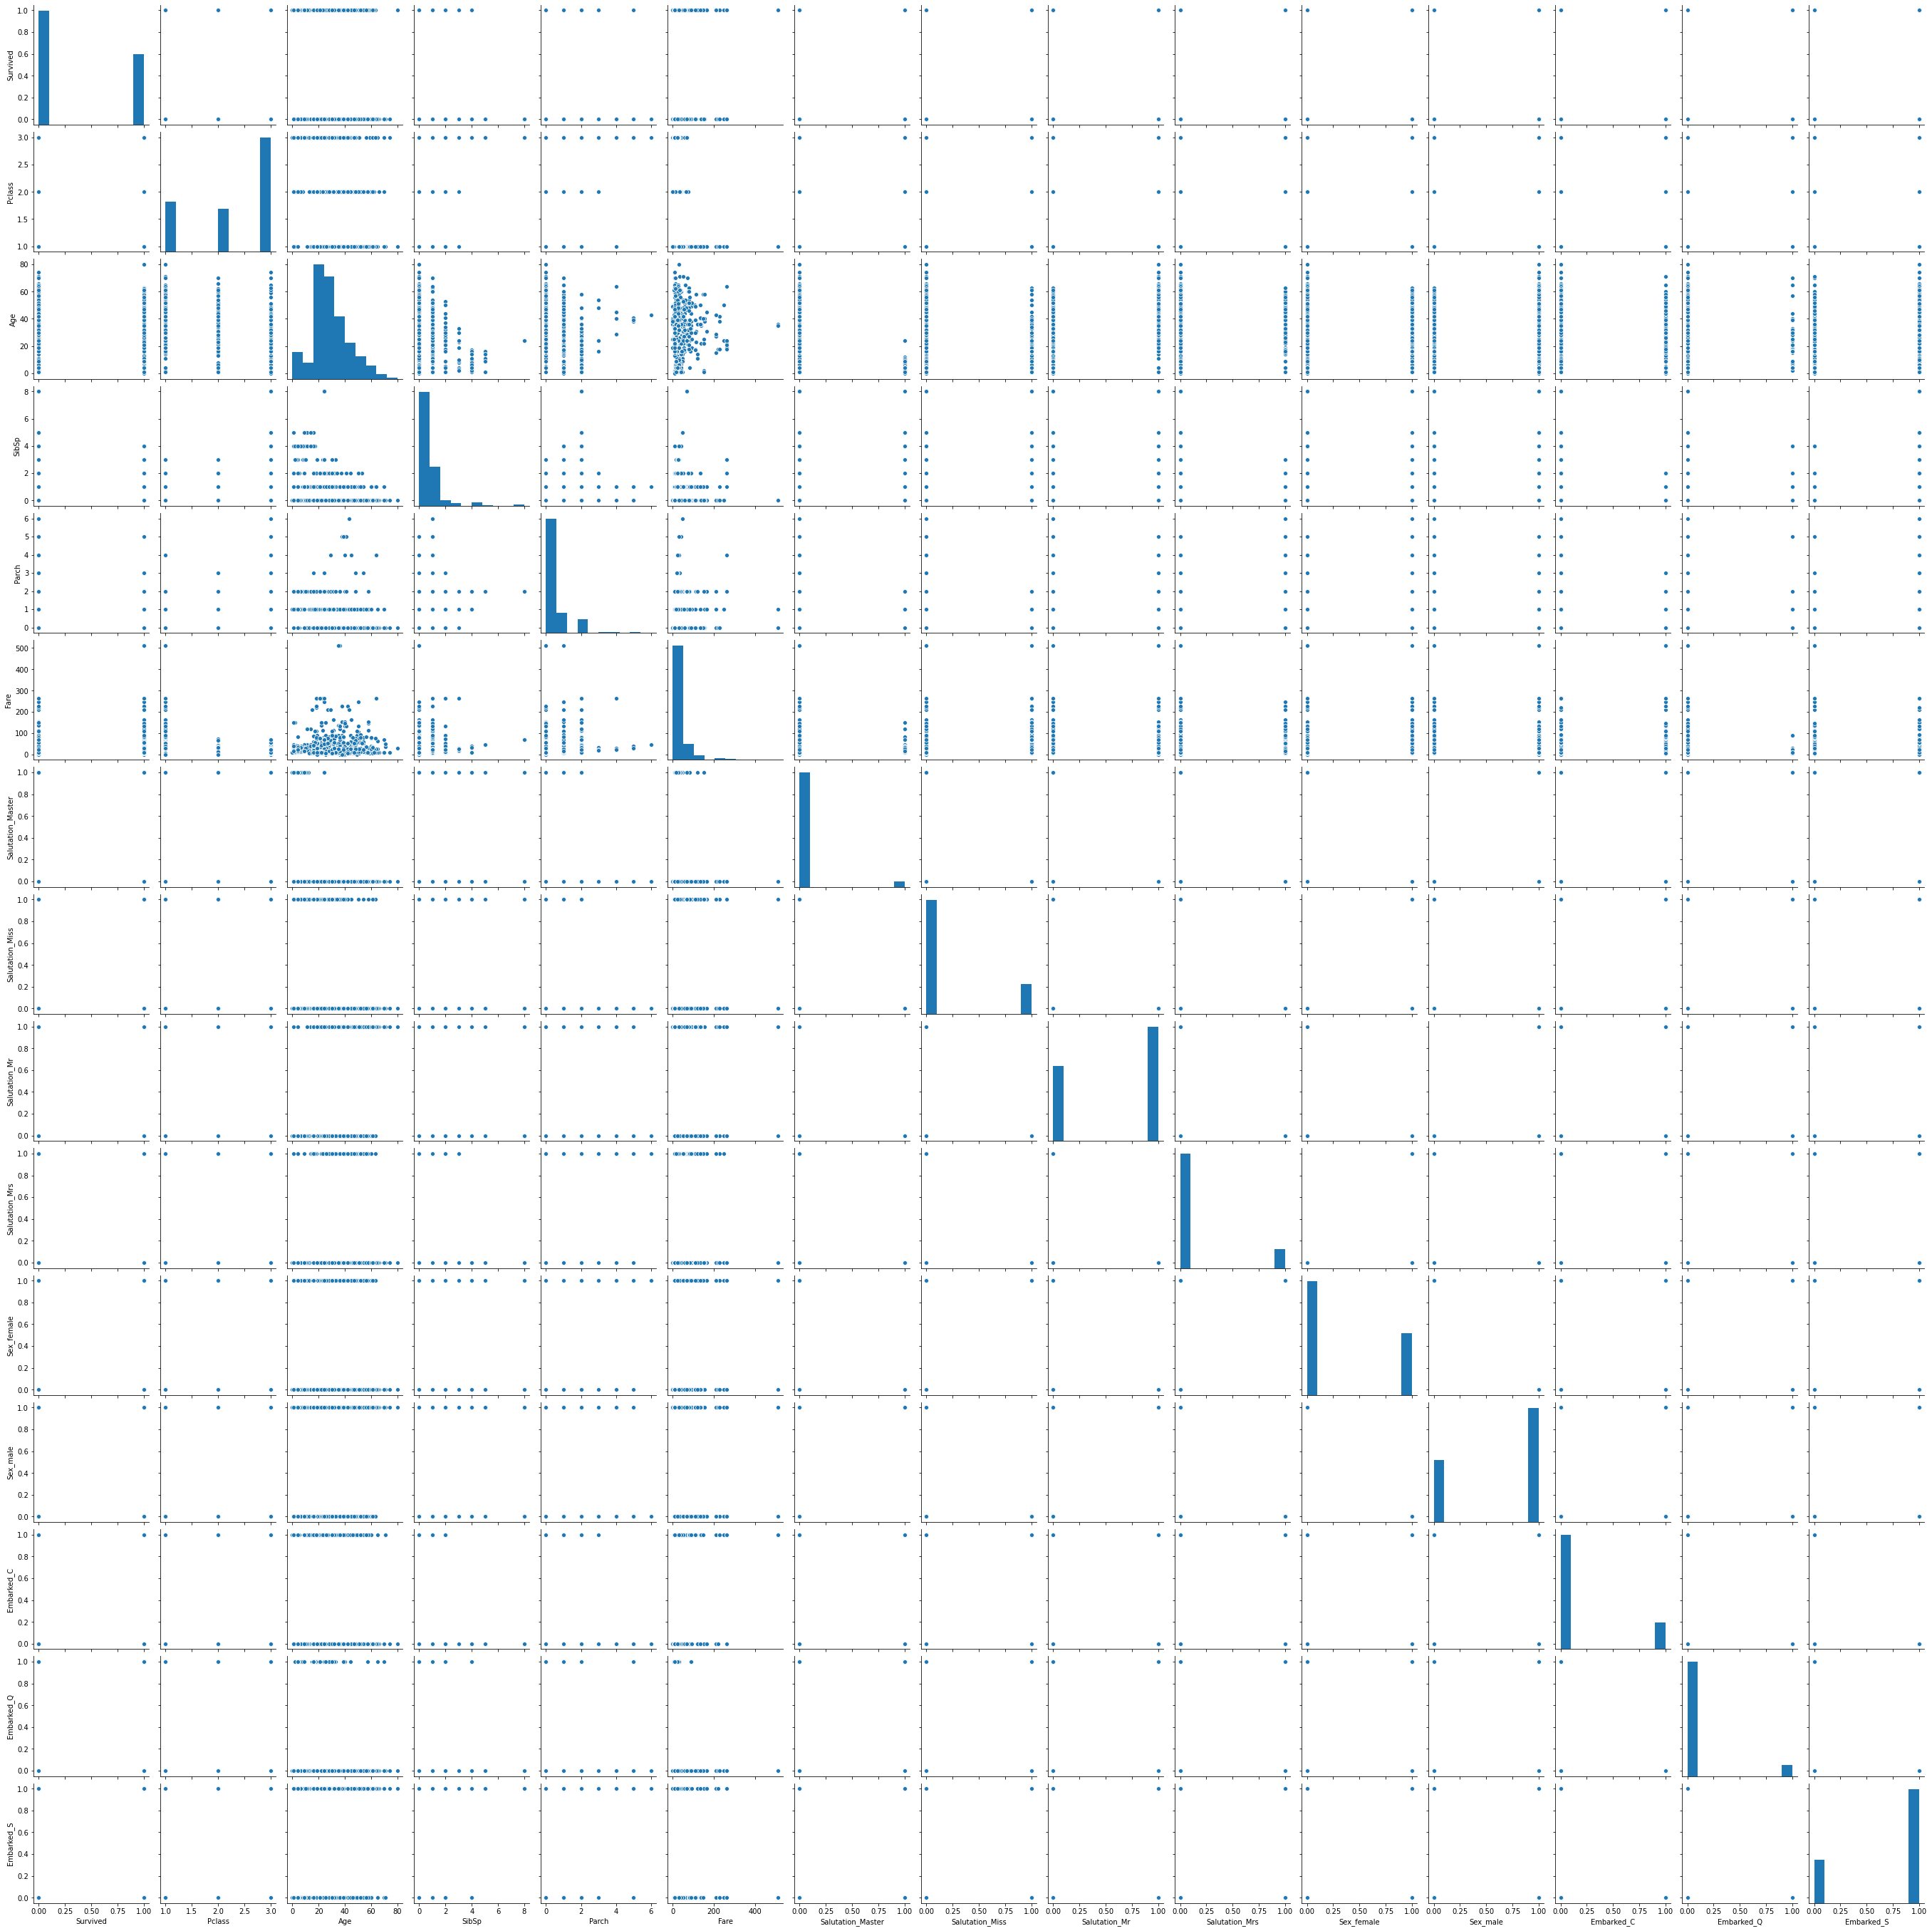

In [555]:
sns.pairplot(df5)

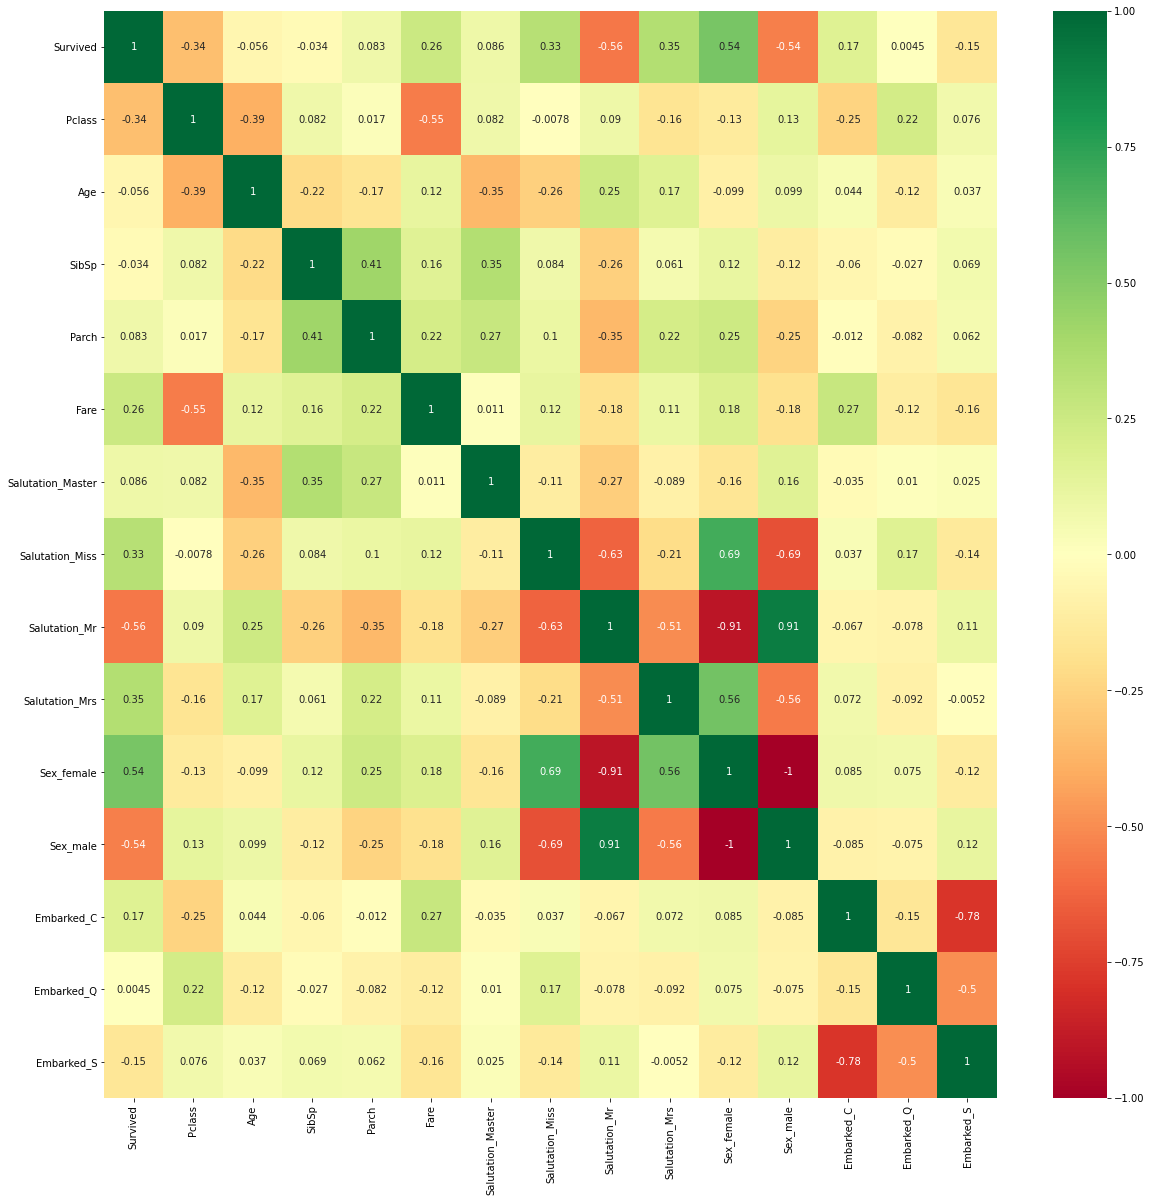

In [556]:
#Check correlation using heatmap
import matplotlib.pyplot as plt
%matplotlib inline

corrmat = df5.corr()
Top_corr_feature = corrmat.index
plt.figure(figsize=(20,20))

plt = sns.heatmap(df5[Top_corr_feature].corr(), annot = True, cmap="RdYlGn")


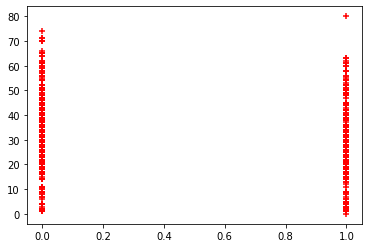

In [557]:
#Check correlation using heatmap
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df5.Survived, df5.Age, marker='+', color='red')

In [558]:
#------ model Training------

In [559]:
df6 = df5.copy()

In [560]:
DV = df6['Survived']

In [561]:
IV = df6.drop(['Survived'], axis = 'columns')

In [562]:
#Now split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(IV, DV, test_size=0.3, shuffle=True)

In [563]:
#Import necesseary libraries
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [564]:
#Create 4 different type of models and store in classifier arry

In [565]:
classifiers = []
model1 = LogisticRegression(random_state=0, max_iter = 2000)
classifiers.append(model1)
model2 = GaussianNB()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [566]:
#Now ittreate classifier array and fit the data with all models

In [567]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    print("Accuracy of %s is %s"%(clf, acc))
    #cm = confusion_matrix(y_test, y_pred)
    #print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of LogisticRegression(max_iter=2000, random_state=0) is 79.7752808988764
Accuracy of GaussianNB() is 79.40074906367042
Accuracy of DecisionTreeClassifier() is 76.02996254681648
Accuracy of RandomForestClassifier() is 80.89887640449437


In [568]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model2, X_train, y_train, cv=5)

In [569]:
scores

array([0.84      , 0.824     , 0.75      , 0.7983871 , 0.81451613])

In [570]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.06)


In [571]:
for clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=5)*100
    print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    print("Accuracy of %s is %s"%(clf, acc))

Training Accuracy: 83.60 (+/- 2.67)
Accuracy of LogisticRegression(max_iter=2000, random_state=0) is 79.7752808988764
Training Accuracy: 80.54 (+/- 6.16)
Accuracy of GaussianNB() is 79.40074906367042
Training Accuracy: 78.62 (+/- 2.84)
Accuracy of DecisionTreeClassifier() is 76.02996254681648
Training Accuracy: 79.25 (+/- 4.82)
Accuracy of RandomForestClassifier() is 80.89887640449437


In [572]:
Predictions= clf.predict(TestDataSet)

In [573]:
Predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [574]:
TestDataSet['Survived'] = Predictions

In [575]:
TestDataSet

,Pclass,Age,SibSp,Parch,Fare,Salutation_Master,Salutation_Miss,Salutation_Mr,Salutation_Mrs,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34.0,0,0,7.829200,0,0,1,0,0,1,0,1,0,0
1,3,47.0,1,0,7.000000,0,0,0,1,1,0,0,0,1,0
2,2,62.0,0,0,9.687500,0,0,1,0,0,1,0,1,0,0
3,3,27.0,0,0,8.662500,0,0,1,0,0,1,0,0,1,1
4,3,22.0,1,1,12.287500,0,0,0,1,1,0,0,0,1,0
5,3,14.0,0,0,9.225000,0,0,1,0,0,1,0,0,1,0
6,3,30.0,0,0,7.629200,0,1,0,0,1,0,0,1,0,0
7,2,26.0,1,1,29.000000,0,0,1,0,0,1,0,0,1,0
8,3,18.0,0,0,7.229200,0,0,0,1,1,0,1,0,0,1
9,3,21.0,2,0,24.150000,0,0,1,0,0,1,0,0,1,0


In [580]:
TestDataSet2['Survived'] = Predictions

In [581]:
Submission = TestDataSet2[['PassengerId','Survived']]

In [582]:
Submission.shape

(418, 2)

In [584]:
Submission.to_csv('Submission1.csv')

In [362]:
TestDataSet

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


In [47]:
#Fill null age values with mean
df3['Age'] = df3['Age'].fillna((df3['Age'].mean()))

In [292]:
df3.shape

(889, 9)

In [59]:
df3.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [86]:
#To handle cabin null values i have 4 methods
#1st delete those rows --> as i can't because number of null values are more
# replace with most occured category --> not possible as there are more number of categories
# create predictive model --> possible
#Create cluster --> not possible

DFCabin = df3.copy()

In [87]:
DFCabin

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C148,C


In [88]:
#Removed named fromd ataset and move cabin to first col
DFCabin = DFCabin[['Cabin','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [89]:
DFCabin.shape

(891, 9)

In [90]:
#Drop complete row where embarked is null
DFCabin = DFCabin.dropna(subset=['Embarked'])

In [91]:
DFCabin.shape

(889, 9)

In [92]:
DFCabin.isnull().sum()

Cabin       687
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [97]:
#Can be treat as train dataset
DFCabinTrain = DFCabin[DFCabin['Cabin'].notna()]
DFCabinTest = DFCabin[DFCabin['Cabin'].isna()]

In [99]:
DFCabinTrain.shape

(202, 9)

In [100]:
DFCabinTest.shape

(687, 9)

In [101]:
DFCabinTrain.isnull().sum()

Cabin       0
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [102]:
DFCabinTest.isnull().sum()

Cabin       687
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [ ]:
#----I have train dataset which is cleaned now i create model and give test data to predict the result---


In [103]:
#Get dummies for categorical vairables
DFCabinTrain2 = pd.get_dummies(DFCabinTrain)

In [105]:
DFCabinTrain2.shape

(202, 157)

In [118]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(DFCabinTrain2, test_size = 0.3)

In [112]:
DFCabinDV = DFCabin['Cabin']

In [113]:
DFCabinDV

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 889, dtype: object

In [114]:
DFCabinIndV = DFCabin.drop(['Cabin'], axis = 'columns')

In [71]:
DFCabinIndV

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [73]:
#Build knearest algorithm
#The entire training dataset is stored. When a prediction is required, 
#the k-most similar records to a new record from the training dataset are then located. 
#From these neighbors, a summarized prediction is made.

In [74]:
#https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

In [82]:
DFCabin.isnull().sum()

Cabin       687
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
DFCabinIV.dropna(subset=[1])